# smile_metric()

Note that "column number" is with respect to the image from the perspective of the camera, and therefore these methods only apply to data that has not been georeferenced.

all smile methods contain a rotate argument that can allow to rotate 90 degrees if needed (to ensure cross-track averaging).

Loading in image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from spectral import *

import hyperquest

# Example usage
path_to_data = '../tests/data/EMIT_L1B_RAD_001_20220827T091626_2223906_009.nc'

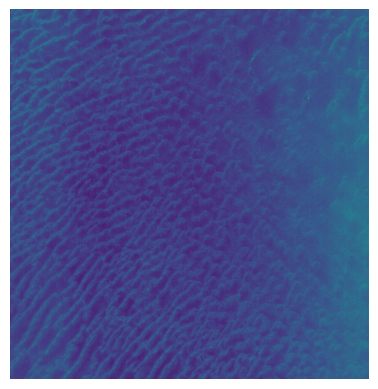

In [2]:
# Load raster
array,_,_,_ = hyperquest.retrieve_data_from_nc(path_to_data)

plt.imshow(array[:,:,1])
plt.axis('off')
plt.show()

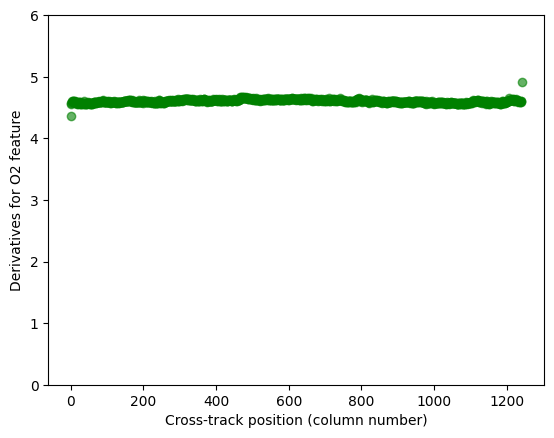

In [3]:
# running smile_metric()
o2_mean, co2_mean, o2_std, co2_std = hyperquest.smile_metric(path_to_data, rotate=0)

# column numbers can be made using the length of the result here
column_numbers = range(0, len(o2_mean))

# plotting
plt.scatter(column_numbers, o2_mean, color='green', alpha=0.6)
plt.ylabel('Derivatives for O2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0,6)
plt.show()

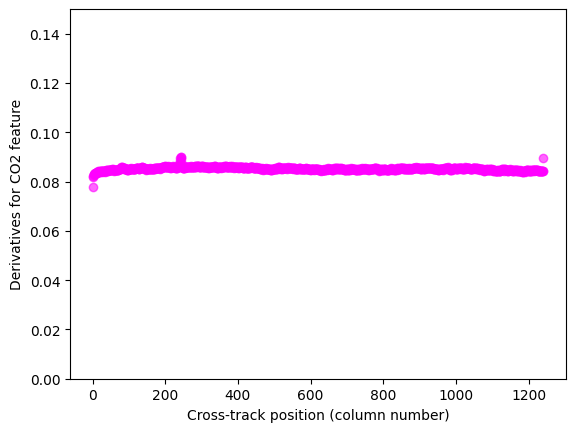

In [5]:
# plotting co2 now
plt.scatter(column_numbers, co2_mean, color='magenta', alpha=0.6)
plt.ylabel('Derivatives for CO2 feature')
plt.xlabel('Cross-track position (column number)')
plt.ylim(0, 0.15)
plt.show()

# nodd_o2a()


In [6]:
path_to_rtm_output_csv = '../tests/data/rtm-SISTER_EMIT_L1B_RDN_20220827T091626_000/radiative_transfer_output.csv'

cwl, fwhm, sensor_band, sensor_fwhm = hyperquest.nodd_o2a(path_to_data,
                                                          rotate = 0, 
                                                          path_to_rtm_output_csv = path_to_rtm_output_csv, 
                                                          rho_s=0.15, # can be assumed , exact reflectance is not needed in NODD
                                                          ncpus=8,
                                                          mask_waterbodies=True)

# outputs
# CWL: array of optimal CWL at sensor_band
# FWHM: array of optimal FWHM at sensor band
# sensor_band: value given in hdr for CWL closest to O2-A.
# sensor_fwhm: value given in hdr for FWHM closest to O2-A.


/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(l_toa_rtm * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: invalid value encountered in divide
  l_toa_model = np.trapz(l_toa_rtm * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/hyperquest/optimization.py:19: RuntimeWarning: divide by zero encountered in divide
  l_toa_model = np.trapz(l_toa_rtm * srf, dx=1) / np.trapz(srf, dx=1)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


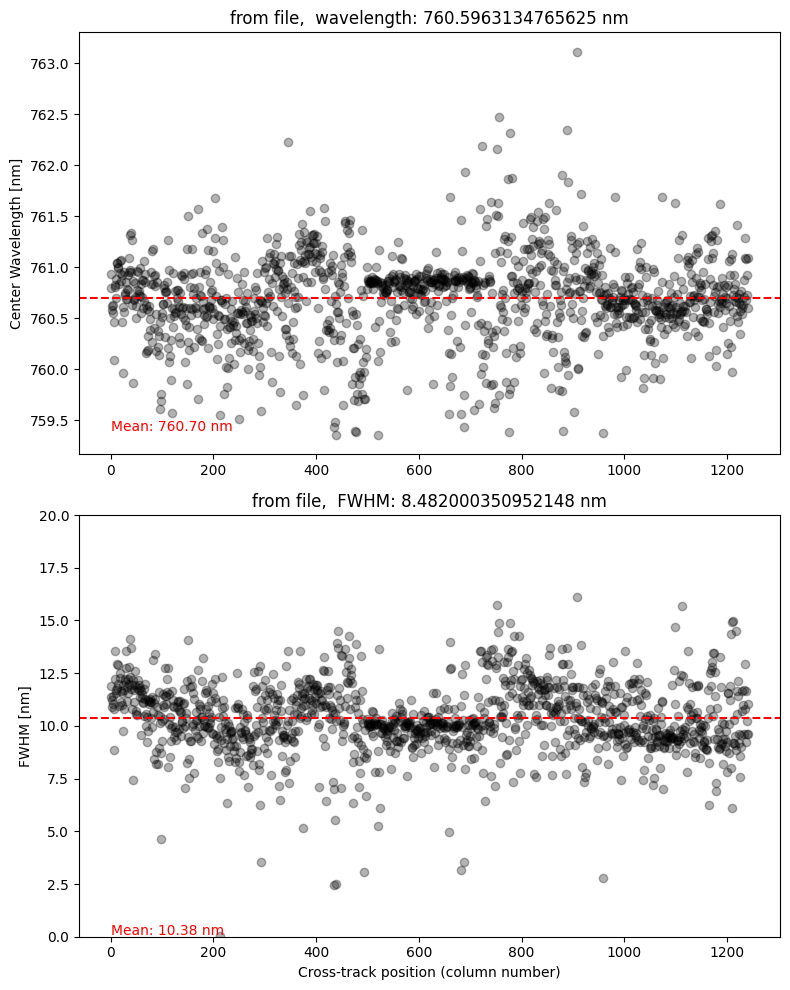

In [8]:
# means
mean_cwl = np.nanmean(cwl)
mean_fwhm = np.nanmean(fwhm)

# plot code
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].scatter(column_numbers, cwl, color='k', alpha=0.3)
ax[0].axhline(mean_cwl, color='r', linestyle='--')
ax[0].text(0, 759.4, f'Mean: {mean_cwl:.2f} nm', color='r') 
ax[0].set_title(f'from file,  wavelength: {sensor_band} nm')
ax[0].set_xlabel('')
ax[0].set_ylabel('Center Wavelength [nm]')

ax[1].scatter(column_numbers, fwhm, color='k', alpha=0.3)
ax[1].axhline(mean_fwhm, color='r', linestyle='--')
ax[1].text(0, 0.1, f'Mean: {mean_fwhm:.2f} nm', color='r') 
ax[1].set_title(f'from file,  FWHM: {sensor_fwhm} nm')
ax[1].set_xlabel('Cross-track position (column number)')
ax[1].set_ylabel('FWHM [nm]')
ax[1].set_ylim(0,20)
plt.tight_layout()
plt.show()